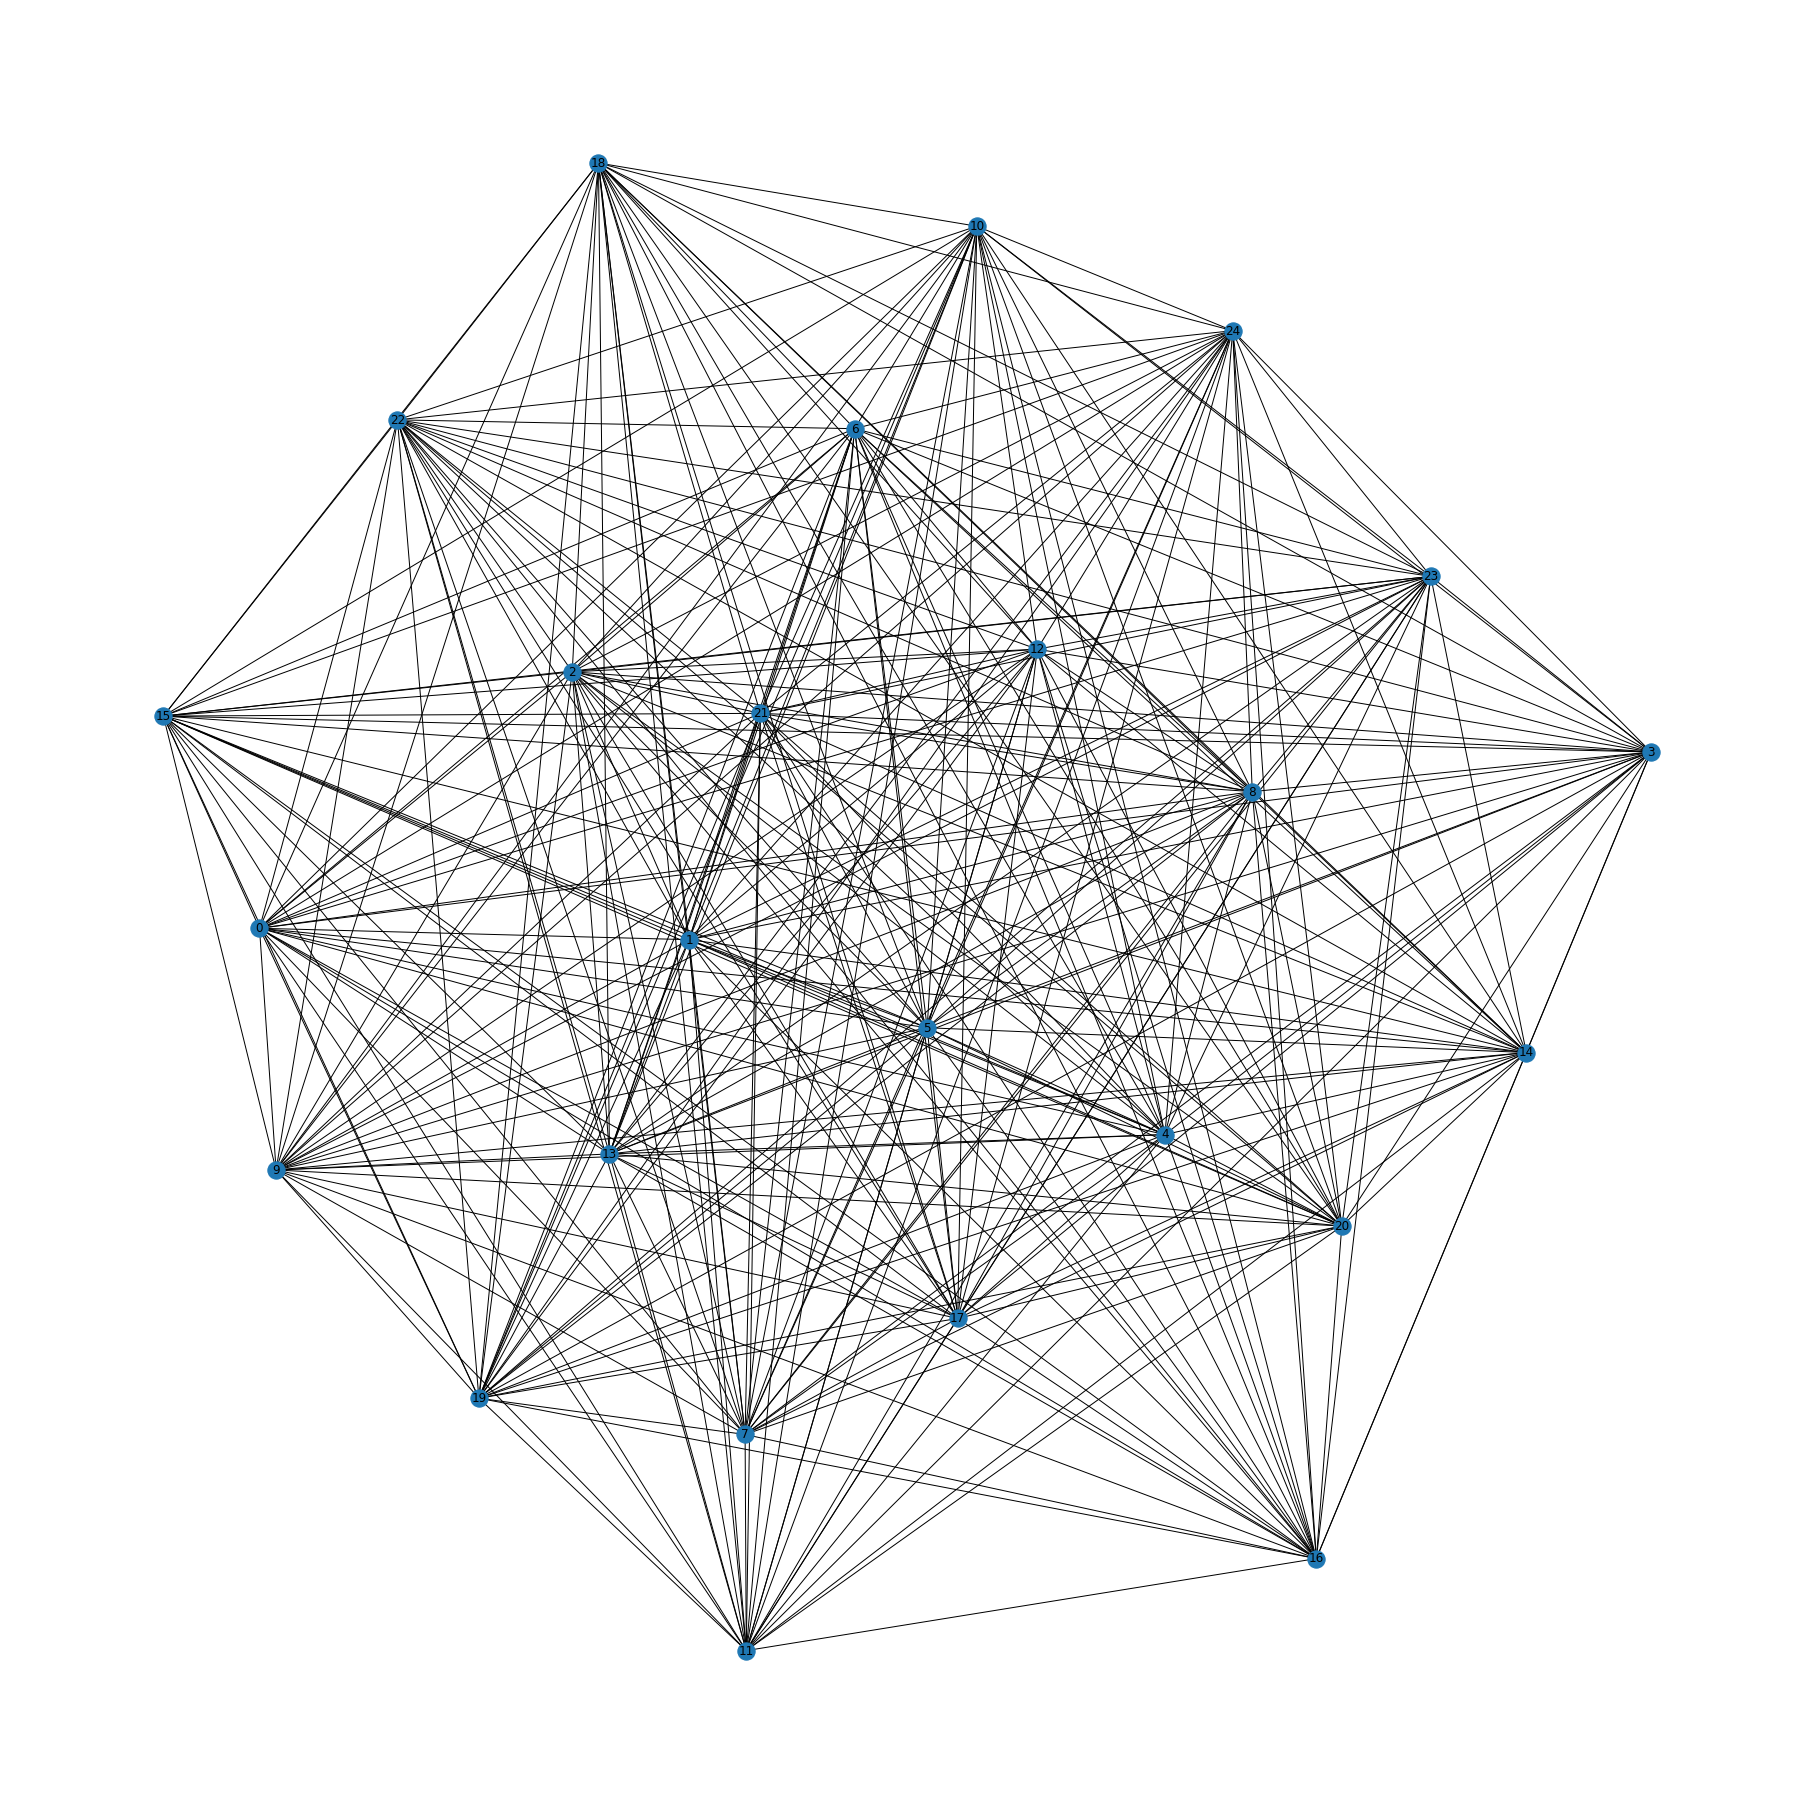

In [13]:
# Initialize the graph
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

G = nx.complete_graph(25)
for (u,v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

plt.figure(figsize=(25,25))
nx.draw(G, with_labels=True)
plt.show()

In [14]:
# Define a function to calculate the tour cost
def cost_of_tour(G, tour):
    cost = 0
    for u, v in zip(tour, tour[1:]):
        cost += G[u][v]["weight"]
    cost += G[len(tour) - 1][0]["weight"]
    return cost

In [15]:
def get_best_neighbour(G, tour, tabu_history, tabu_limit, aspiration):
    best_neighbour = None
    best_neighbour_cost = math.inf
    # generate a list of all possible neighbours
    # a neighbour is just swapping the position of two nodes within the tour
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            if i == j:
                continue

            # Swap the ith and jth nodes
            tmp_route = tour.copy()
            tmp = tmp_route[i]
            tmp_route[i] = tmp_route[j]
            tmp_route[j] = tmp
            tmp_cost = cost_of_tour(G, tmp_route)

            # This route is tabu, check aspiration
            if tuple(tmp_route) in tabu_history:
                if tabu_history[tuple(tmp_route)] > 0:
                    if tabu_history[tuple(tmp_route)] > aspiration:
                        continue

            if tmp_cost < best_neighbour_cost:
                best_neighbour_cost = tmp_cost
                best_neighbour = tmp_route
                tabu_history[tuple(best_neighbour)] = tabu_limit

    return best_neighbour

In [16]:
def tabu_search(
    G,
    initial_solution,
    num_iter,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_function,
    neighbour_function,
    use_historical_best=False,
    use_tqdm = False
):
    best_solution = initial_solution
    historical_best = best_solution
    historical_best_cost = cost_function(G,historical_best)
    best_cost = cost_function(G, best_solution)
    states = [best_cost]
    if use_tqdm:
        pbar = tqdm(total=num_iter)
    for _ in range(num_iter):
        # Reduce counter for all tabu
        if use_tqdm: pbar.update()
        for x in tabu_history:
            tabu_history[x] -= 1
        tabu_history = {x: tabu_history[x] for x in tabu_history if tabu_history[x] > 0}

        best_solution = neighbour_function(
            G, best_solution, tabu_history, tabu_limit, aspiration
        )
        best_cost = cost_function(G, best_solution)
        if best_cost <= historical_best_cost: 
            historical_best = best_solution
            historical_best_cost = best_cost
        states.append(best_cost)
    return best_solution, best_cost, states

Initial solution: [2, 5, 17, 11, 13, 6, 24, 22, 4, 18, 20, 14, 21, 15, 3, 12, 1, 7, 0, 10, 9, 16, 19, 23, 8]
Initial cost: 123
Best Solution: [3, 22, 11, 18, 13, 16, 4, 2, 24, 20, 9, 15, 21, 14, 5, 12, 1, 7, 17, 10, 8, 6, 19, 23, 0]
Best Cost: 35


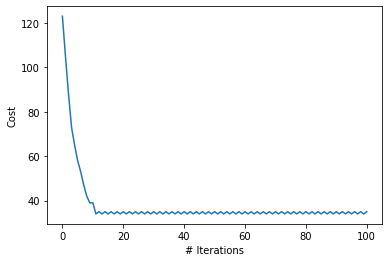

In [17]:
# Initialize some parameters
aspiration = 2
tabu_history = {}
num_iterations = 100
tabu_limit = 5

# Initialize a random solution, and its cost
initial_solution = [*G.nodes()]
random.shuffle(initial_solution)
initial_cost = cost_of_tour(G, initial_solution)
print(f"Initial solution: {initial_solution}")
print(f"Initial cost: {initial_cost}")

best_solution, best_cost, states = tabu_search(
    G,
    initial_solution,
    num_iterations,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_of_tour,
    get_best_neighbour,
)
print(f"Best Solution: {best_solution}")
print(f"Best Cost: {best_cost}")
plt.xlabel("# Iterations")
plt.ylabel("Cost")
plt.plot(states)
plt.show()

### **https://smartmobilityalgorithms.github.io/book/content/TrajectoryAlgorithms/TabuSearch.html**